### Exercise 1

In this exercise you need to plot ocean depth against ocean age. You have the topography / bathymetry data and the age data. You should do this for the "deep oceans" to avoid including the continental shelves and, for that matter, the continents. The age dataset is only valid where there are magnetic stripes. Other places in the grid are flagged as _"Not a Number"_ or _NaN_ and will not plot. You might have to strip out these points for plotting / curve fitting though.

### Instructions 

You can submit this notebook by email but you MUST rename it so we know who it is from. If you used a crazy pseudonym, please let us know when you submit your assigments. 

I expect to be able to run this notebook before I read your answer!

In [102]:
%pylab inline

#importing relevant packages
#mapping package
import cartopy.crs as ccrs
#plotting package
import matplotlib.pyplot as plt
#numpy
import numpy as np
#for movement arrows of plate movement
from scipy.io import netcdf

Populating the interactive namespace from numpy and matplotlib


## Hint

You will need to have the two datasets at the same resolution and valid data shape. The data are stored in an image so re-interpolation can be done with the image resizing fanciness available in ... (guess where !)

In [103]:
#just checking where the file is within my directory
!pwd

/Users/Emily/Python-for-Geoscientists/CourseContent/ForAssessment


In [104]:
from skimage.transform import resize as imresize
# resize = return a new array with the specified shape

# load in ETOPO1 data
with np.load("../Data/Resources/ETOPO1_Ice_c_geotiff.npz", 'r') as npz:
    etopoH_img = npz['data']

# resample
etopoH_img = etopoH_img[::4,::4]

# load in age data
ages = np.load("../Data/Resources/global_age_data.3.6.z.npz")["ageData"]

# here etopoH_1 comes from resizing the etopoH_img array to the 
# shape of the ages.shape, the order=1 means bilinear interpolation
# which is the default
# points outside the boundaries of the input are filled according
# to the given mode - in this case, wrap =
# pads with the wrap of the vector along the axis
# the first values are used to pad the end and the end values 
# are used to pad the beginning.
etopoH_1 = imresize(etopoH_img, ages.shape, order=1, mode='wrap',preserve_range=True)

# this means the array we just created etopoH_1 is enclosing
# an array testing whether the values are NaN
# output array has true for the indices which are NaNs in the
# original array and false for the rest - this equals np.nan
# which is a float of nan in string form
etopoH_1[np.isnan(ages)] = np.nan

#can see by printing etopoH_img.shape and etopoH_1.shape (what we
# created) that the size of the array has decreased and matches
# ages.shape array size
print (etopoH_img.shape)
print (etopoH_1.shape)
print (ages.shape)

(2700, 5400)
(1801, 3601)
(1801, 3601)


## Task

Make a map of `etopoH_1` and `ages` (check they are the same shape and same NaN mask)

It may also help to plot plate motion arrows on the map to highlight divergent v. convergent zones. In order to do this "intuitively" you probably should choose the NNR (no net rotation) velocity field which tends to show major ridges as spreading in opposite directions. 

You will need to think about:

  * which features are useful to include (a coastline, shaded relief etc ?) 
  * plate motion arrows (see `GlobalPlateMotions` notebook) ? 

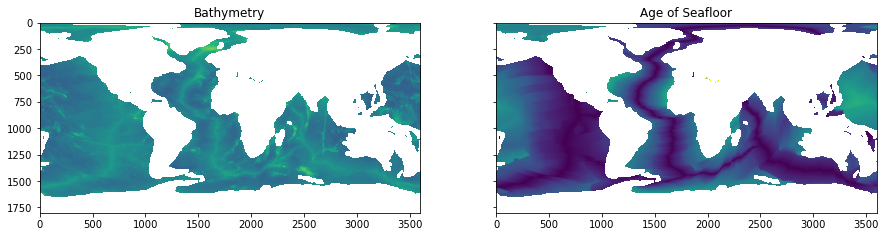

In [106]:
# etopoH_1 and ages plotted basically
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(15,6))
ax1.imshow(etopoH_1)
ax1.set_title('Bathymetry')
ax2.imshow(ages)
ax2.set_title('Age of Seafloor')

pass

In [107]:
#data to set the plate motion arrows
rootgrp = netcdf.netcdf_file(filename="../Data/Reference/velocity_NNR.nc", version=2)

ve = rootgrp.variables["ve"]
vn = rootgrp.variables["vn"]

lonv = rootgrp.variables["lon"]
latv = rootgrp.variables["lat"]

lons = lonv[::5]
lats = latv[::5]
llX, llY = np.meshgrid(lons,lats)

#llX = llX.reshape(-1)
#llY = llY.reshape(-1)

Veast = (np.array(ve[::5,::5]).T)
Vnorth = (np.array(vn[::5,::5]).T)

Vorientation = np.arctan2(Vnorth,Veast)

/Users/Emily/opt/miniconda3/lib/python3.8/site-packages/scipy/io/netcdf.py:308: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  warnings.warn((


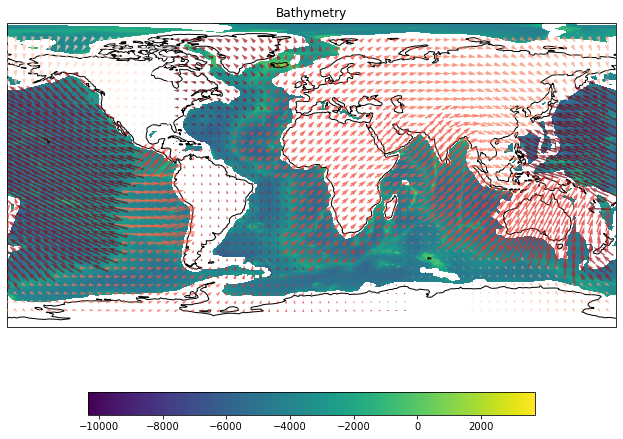

In [236]:
#new plot with plate motion arrows

fig = plt.figure(figsize=(20, 8), facecolor="none")
ax  = plt.axes(projection=ccrs.PlateCarree())
global_extent     = [-180.0, 180.0, -90.0, 90.0]

ax.set_extent(global_extent)
plt.imshow(etopoH_1, zorder=0, transform=ccrs.PlateCarree(), extent=global_extent)
ax.coastlines(color="Black", zorder=1)
ax.set_title('Bathymetry')

mappable1 = ax.quiver(llX, llY, Veast, Vnorth, Vorientation, scale=2000, transform=ccrs.PlateCarree(),
        cmap=cm.Reds, alpha=0.7, zorder=13, pivot="mid")

plt.colorbar(orientation='horizontal', shrink = 0.4)
plt.show()


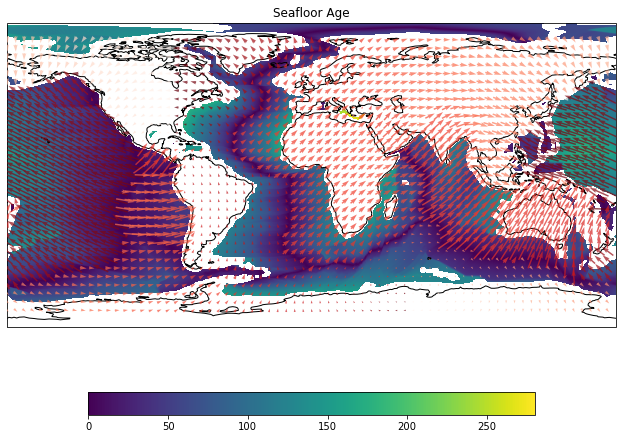

In [237]:
fig = plt.figure(figsize=(20, 8), facecolor="none")
ax  = plt.axes(projection=ccrs.PlateCarree())
global_extent     = [-180.0, 180.0, -90.0, 90.0]

ax.set_extent(global_extent)
plt.imshow(ages, zorder=0, transform=ccrs.PlateCarree(), extent=global_extent)
ax.coastlines(color="Black", zorder=1)
ax.set_title('Seafloor Age')

mappable1 = ax.quiver(llX, llY, Veast, Vnorth, Vorientation, scale=2000, transform=ccrs.PlateCarree(),
        cmap=cm.Reds, alpha=0.7, zorder=13, pivot="mid")

plt.colorbar(orientation='horizontal', shrink = 0.4)


plt.show()

### Task

Make a scatter plot of the depth against age. You might need to downsample the number of points as there are a lot of them:

```python 
ages_decimated = ages[::10]
topo_decimated = etopoH[::10]
``` 

Do you see any systematic trend ?

**Hint:** don't worry if you do not 

In [238]:
ages_decimated = ages[::10]
topo_decimated = etopoH_1[::10]

In [239]:
print(ages_decimated.shape)
print(topo_decimated.shape)

(181, 3601)
(181, 3601)


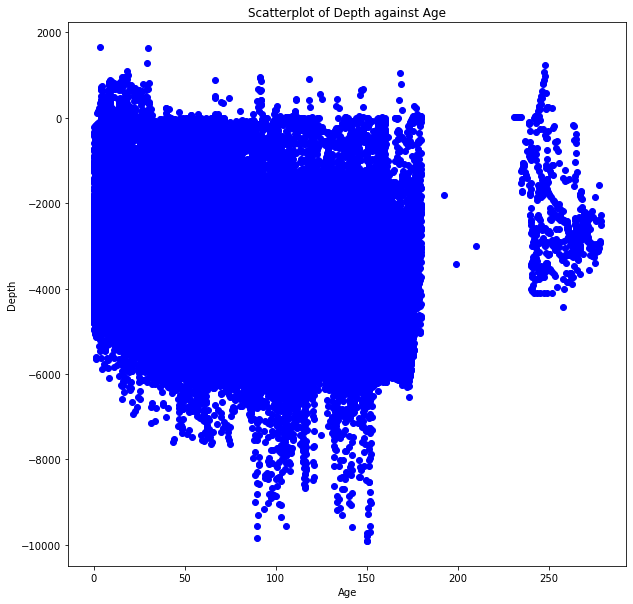

In [240]:
## inverted axis for x and y values so that they made more sense - going deeper means closer to the x axis and 
## gets older moving right. wanted to also plot as points and not lines because it was just a big climp before


fig = plt.figure(figsize=(10, 10), facecolor="none", edgecolor="none")
plt.plot(ages_decimated,topo_decimated,'bo')
plt.title('Scatterplot of Depth against Age')
plt.ylabel('Depth')
plt.xlabel('Age')



plt.show()

In [241]:
#downsizing columns as well
ages_decimated2 = ages[::10,::10]
topo_decimated2 = etopoH_1[::10,::10]

In [242]:
print(ages_decimated2.shape)
print(topo_decimated2.shape)

(181, 361)
(181, 361)


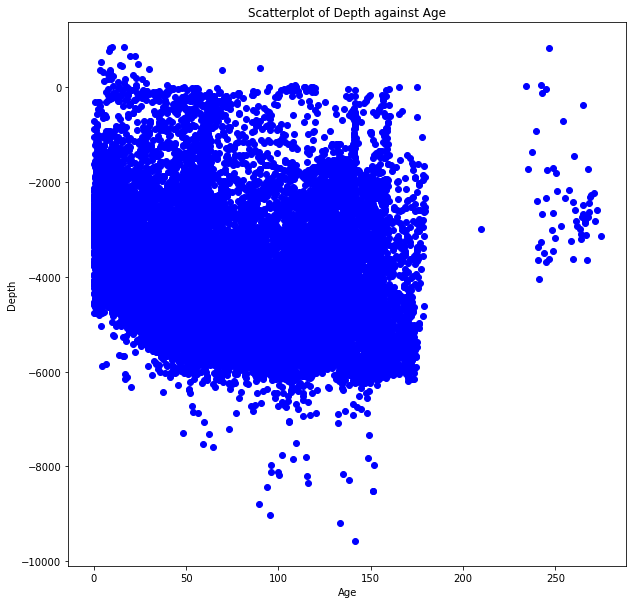

In [243]:
## inverted axis for x and y values so that they made more sense - going deeper means closer to the x axis and 
## gets older moving right. wanted to also plot as points and not lines because it was just a big climp before


fig = plt.figure(figsize=(10, 10), facecolor="none", edgecolor="none")
plt.plot(ages_decimated2,topo_decimated2,'bo')
plt.title('Scatterplot of Depth against Age')
plt.ylabel('Depth')
plt.xlabel('Age')



plt.show()

#this one has less data points again

# Smoothing

Now try interpolating the bathymetry to a smoothed / downsampled version of the ages.

```python
ages_reduced = ages[::8,::8] # This is arbitrary, you should try some different ones

# OR

ages_reduced1 = imresize(ages, (226,451), order=0, mode="wrap")

# OR

ages_reduced2 = imresize(ages, (226,451), order=1, mode="wrap")

# OR

ages_reduced3 = imresize(ages, (226,451), order=3, mode="wrap")

```

Comment on which of these is the more effective.


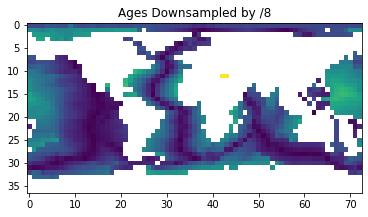

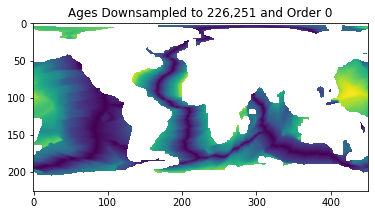

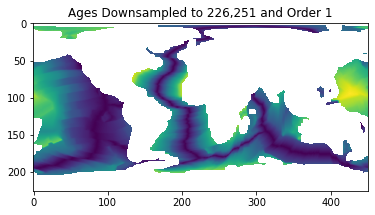

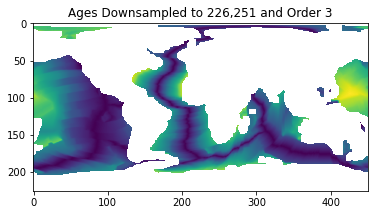

In [116]:
ages_reduced  = ages[::50,::50] # This is arbitrary, you should try some different ones
plt.imshow(ages_reduced)
plt.title('Ages Downsampled by /8')
plt.show()
#this shows too few points make it more pixelated, more data makes it smoother 

ages_reduced1 = imresize(ages, (226,451), order=0, mode="wrap")
plt.imshow(ages_reduced1)
plt.title('Ages Downsampled to 226,251 and Order 0')
plt.show()

ages_reduced2 = imresize(ages, (226,451), order=1, mode="wrap")
plt.imshow(ages_reduced2)
plt.title('Ages Downsampled to 226,251 and Order 1')
plt.show()


ages_reduced3 = imresize(ages, (226,451), order=3, mode="wrap")
plt.imshow(ages_reduced3)
plt.title('Ages Downsampled to 226,251 and Order 3')
plt.show()



## This is what the order values mean

Taken from Scikit Image module page for _transform_:
 - `0: Nearest-neighbor`
 - `1: Bi-linear (default)`
 - 2: Bi-quadratic
 - `3: Bi-cubic`
 - 4: Bi-quartic
 - 5: Bi-quintic
 - `Default is 0 if image.dtype is bool and 1 otherwise.`
 
 Those highlighted are the ones explored. I attempted the others but its clear the data is not compatible to be presented in the order of 2, 4 and 5. Changing them meant that the landmasses became less exact in how they are presented: slightly more enlarged, fuzzier boundaries, loss of seas that were still on the map when data downsized by /8.
 
By downsampling the ocean ages data became sharper in points, especially the lighter colours on the map. Taking ages and reshaping the array to (226, 451) meant that the data was more effectively presented on the sea floor. Order 0,1 and 3 are only marginally different in how they present, I would be happy with all in terms of how effective they are at displaying the information.

### Task

Plot the age/depth data and see if it looks smoother.

Make a scatterplot with this data too (note: you will have to downsample the bathymetry too)

Does smoothing help bring out a trend ?


In [117]:
topo_reduced = etopoH_1[::50,::50]
topo_reduced1 = imresize(etopoH_1, (226,451), order=0, mode="wrap")
topo_reduced2 = imresize(etopoH_1, (226,451), order=1, mode="wrap")
topo_reduced3 = imresize(etopoH_1, (226,451), order=3, mode="wrap")

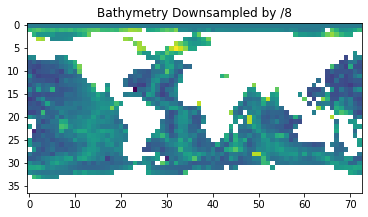

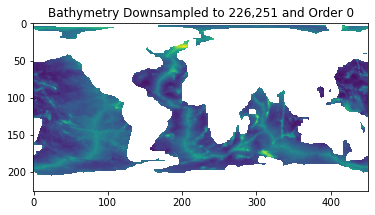

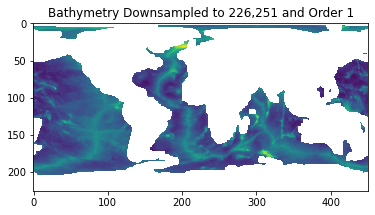

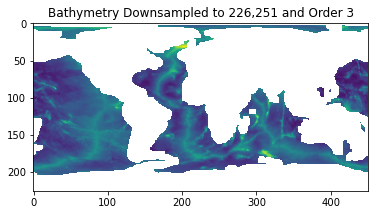

In [118]:
plt.imshow(topo_reduced)
plt.title('Bathymetry Downsampled by /8')
plt.show()
#this shows too few points make it more pixelated, more data makes it smoother 

#topo_reduced1
plt.imshow(topo_reduced1)
plt.title('Bathymetry Downsampled to 226,251 and Order 0')
plt.show()

plt.imshow(topo_reduced2)
plt.title('Bathymetry Downsampled to 226,251 and Order 1')
plt.show()

plt.imshow(topo_reduced3)
plt.title('Bathymetry Downsampled to 226,251 and Order 3')
plt.show()

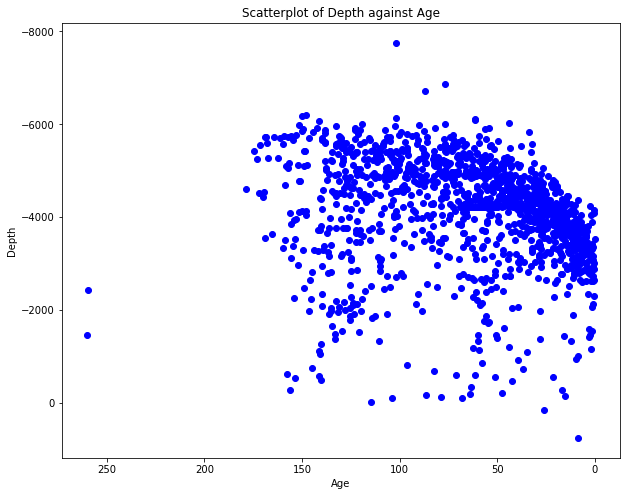

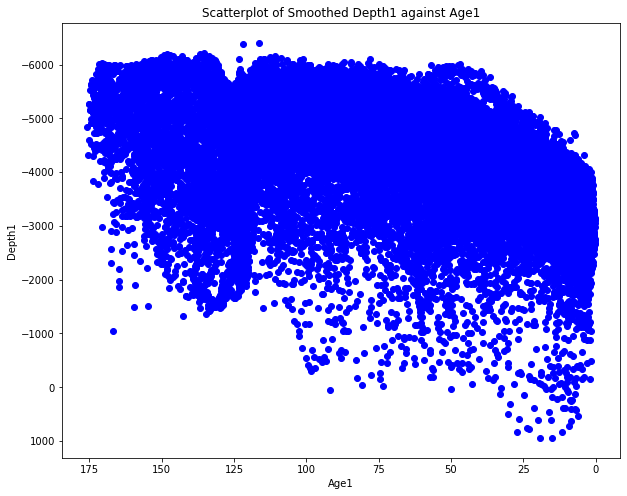

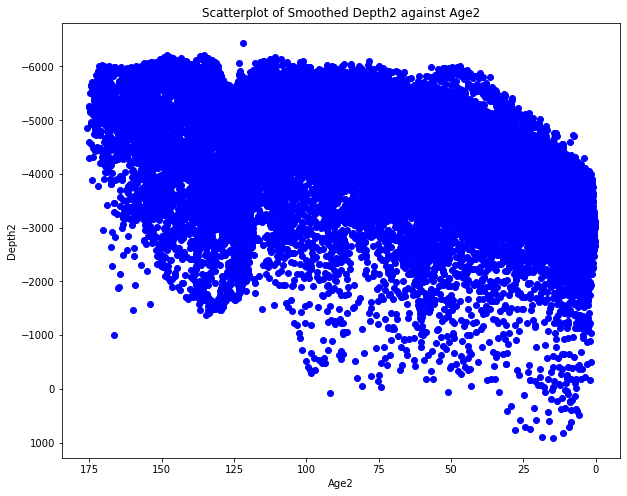

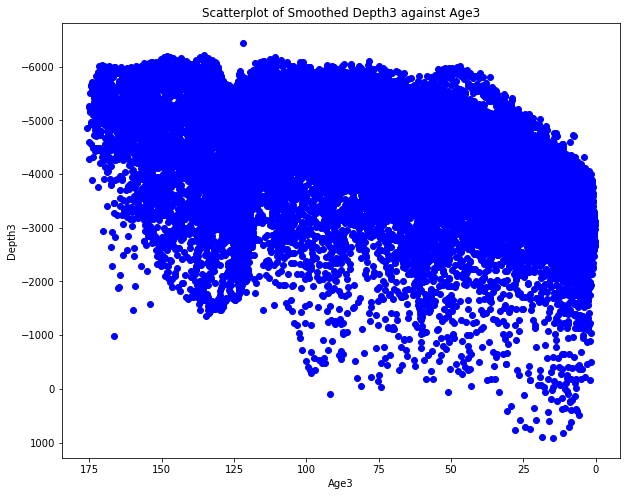

In [119]:
fig = plt.figure(figsize=(10, 8), facecolor="none", edgecolor="none")
plt.plot(ages_reduced,topo_reduced,'bo')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.title('Scatterplot of Depth against Age')
plt.ylabel('Depth')
plt.xlabel('Age')
plt.show()

fig = plt.figure(figsize=(10, 8), facecolor="none", edgecolor="none")
plt.plot(ages_reduced1,topo_reduced1,'bo')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.title('Scatterplot of Smoothed Depth1 against Age1')
plt.ylabel('Depth1')
plt.xlabel('Age1')
plt.show()

fig = plt.figure(figsize=(10, 8), facecolor="none", edgecolor="none")
plt.plot(ages_reduced2,topo_reduced2,'bo')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.title('Scatterplot of Smoothed Depth2 against Age2')
plt.ylabel('Depth2')
plt.xlabel('Age2')
plt.show()

fig = plt.figure(figsize=(10, 8), facecolor="none", edgecolor="none")
plt.plot(ages_reduced3,topo_reduced3,'bo')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.title('Scatterplot of Smoothed Depth3 against Age3')
plt.ylabel('Depth3')
plt.xlabel('Age3')
plt.show()


In downsizing data, both Ages and Bathymetry appear smoother. The orders proved more useful than the first case for both ages and bathymetry, although for ages order 0, 1 and 2 provided similar results, it appeared as if the boundary of the continents became fuzzier. For Bathymetry, the same can be said.

When it comes to the scatter plot, the first and second case (ages_reduced,topo_reduced) and (ages_reduced1,topo_reduced1) the plot seemed fairly similar to the previous one, however the first case had less points than the second. reduced2 and reduced 3 seem to have too few points, also the axis do not respond well.

### Task

Fit $ \textrm{depth} = A + B\sqrt{\textrm{age}} $ to this data and create a plot

You should be able to use 

```python
from scipy.optimize import curve_fit
help(curve_fit)
```



In [244]:
from scipy.optimize import curve_fit

In [245]:
help(curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``.
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...). It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : array_like or object
        The independent variable where the data is measured.
        Should usually be an M-length sequence or an (k,M)-shaped array for
        functions with k predictors, but can actually be any object.
    ydata : array_like
        The dependent data, a length M array - nominally ``f(xdata, ...)``.
    p0 : array_like, optional
        Initial guess for the parameters (length N). If None, then the
        initi

In [246]:
def func(x, a, b):
    """
    Fitting function for the data
    """
    return a + b*(sqrt(x))

#two parameters, ab

In [247]:
mask_e = np.isfinite(topo_reduced1)
etopoH = topo_reduced1[mask_e]
print(etopoH.shape)

mask_a = np.isfinite(ages_reduced1)
age = ages_reduced1[mask_a]
print(age.shape)

(44232,)
(44232,)


In [248]:
print(np.isnan(etopoH))
print(np.isnan(age))
print(etopoH)
print(age)


[False False False ... False False False]
[False False False ... False False False]
[-3031.86277489 -3082.65068359 -3250.83402924 ... -3801.25180339
 -3854.33923968 -3909.46042316]
[56.59575639 56.53549591 56.54618981 ... 79.74288874 79.84260304
 79.75084688]


func(age, a=10.000407125761978, b=2.0000664941020987)


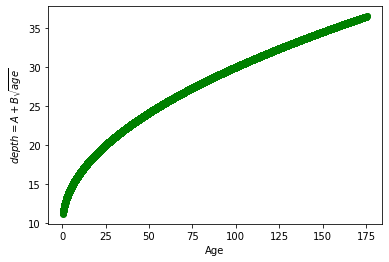

In [249]:
#this is the independent variable, age
xdata = age
#this is the dependent variable, the function, which will change dpeneding on
#how the independent variable is manipulated
ydata = func(xdata, 10, 2)
#y_noise = 0.2 * np.random.normal(size=xdata.size)
#ydata = y + y_noise
plt.plot(xdata, ydata, 'go', label='Data')
plt.xlabel("Age")
plt.ylabel("$ \t{depth} = A + B\sqrt{\t{age}} $")
print ("func(age, a={}, b={})".format(popt[0], popt[1]))

pass

func(x, a=10.0, b=2.0)


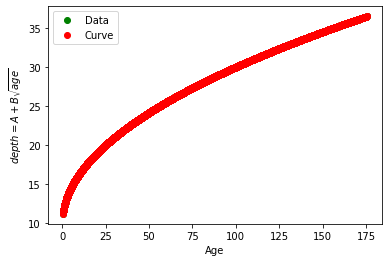

In [250]:
# Fit for the parameters a, b of the function func
popt, pcov = curve_fit(func, xdata, ydata)
print ("func(x, a={}, b={})".format(popt[0], popt[1]))

# Now func (x, *popt) will give the y values of the fitted function

#Data plot
plt.plot(xdata, ydata, 'go', label='Data')
#Curve plot
plt.plot(xdata, func(xdata, *popt), 'ro', label='Curve', linewidth=5)
#putting labels on the plot and a legend
plt.xlabel("Age")
plt.ylabel("$ \t{depth} = A + B\sqrt{\t{age}} $")
plt.legend()


pass

func(x, a=9.997265885097189, b=2.000307687323907)


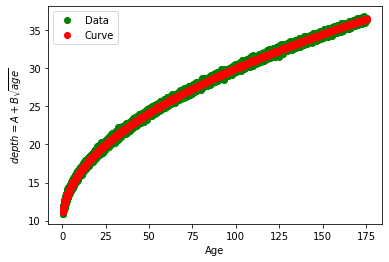

In [251]:
# a noisy plot to see the data behind the curve (just to check how close it is) - clear that the data (without
#noise which is what we want) is sitting right underneath the curve
#this is the independent variable, age
xdata = age
#this is the dependent variable, the function, which will change dpeneding on
#how the independent variable is manipulated
y = func(xdata, 10, 2)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise

# Fit for the parameters a, b of the function func
popt, pcov = curve_fit(func, xdata, ydata)
print ("func(x, a={}, b={})".format(popt[0], popt[1]))

# Now func (x, *popt) will give the y values of the fitted function

#Data plot
plt.plot(xdata, ydata, 'go', label='Data')
#Curve plot
plt.plot(xdata, func(xdata, *popt), 'ro', label='Curve', linewidth=1)
#putting labels on the plot and a legend
plt.xlabel("Age")
plt.ylabel("$ \t{depth} = A + B\sqrt{\t{age}} $")
plt.legend()


pass

### Discussion

Obviously there are problems with the data - looking at every pixel in the image does not account for regions where there are sea mounts or other features on the ocean floor that we might consider anomalous. Actually, the other reason this doesn't work very well is that it fails to account for sediment accumulation and loading.